In [85]:
import random
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import tensorflow as tf
import seaborn as sns

from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from matplotlib.ticker import MultipleLocator, FormatStrFormatter

plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["image.cmap"] = "gray"

In [42]:
from tensorflow.keras.datasets import fashion_mnist

In [43]:
SEED_VALUE = 42
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [44]:
(X_train_all, y_train_all), (X_test, y_test) = mnist.load_data()

In [45]:
X_valid = X_train_all[:10000]
X_train = X_train_all[10000:]
y_valid = y_train_all[:10000]
y_train = y_train_all[10000:]

print(X_valid.shape, y_valid.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(10000, 28, 28) (10000,)
(50000, 28, 28) (50000,)
(10000, 28, 28) (10000,)


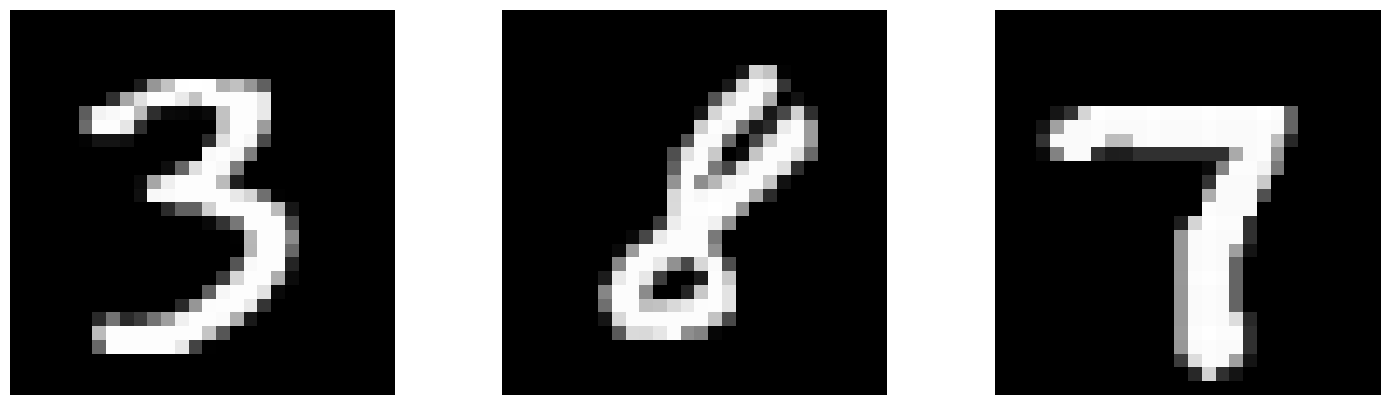

In [46]:
plt.figure(figsize=(18,5))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.axis("off")
    plt.imshow(X_train[i])

Shape of the image is 28 x 28 which means it is 2D.

We need to make it 1D so we can pass it as a feature for training.

For each of the images (.shape[0]),  we convert it to 1D (28*28) and then normalize.

In [47]:
X_train = X_train.reshape((X_train.shape[0]), 28*28)
X_train = X_train.astype("float32")/255

X_test = X_test.reshape((X_test.shape[0]), 28*28)
X_test = X_test.astype("float32")/255

X_valid = X_valid.reshape((X_valid.shape[0]), 28*28)
X_valid = X_valid.astype("float32")/255

In [48]:
print(X_valid.shape, y_valid.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(10000, 784) (10000,)
(50000, 784) (50000,)
(10000, 784) (10000,)


In [15]:
dir(tf.keras.datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'boston_housing',
 'california_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

In [16]:
dir(tf.keras.datasets.fashion_mnist)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'load_data']

In [49]:
(x_train_fashion, y_train_fashion), (_,_) = fashion_mnist.load_data()

In [50]:
y_train_fashion[0:9]

array([9, 0, 0, 3, 0, 2, 7, 2, 5], dtype=uint8)

In [51]:
y_train_onehot = to_categorical(y_train_fashion[0:9])
y_train_onehot

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [52]:
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

In [53]:
model = tf.keras.Sequential()

model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

C:\Users\rinit\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
model.compile(
    optimizer='adam',
    loss="categorical_crossentropy",
    metrics=['accuracy']
)

In [55]:
training_results = model.fit(X_train, y_train,
                            epochs=20,
                            batch_size=64,
                            validation_data=(X_valid,y_valid));

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8585 - loss: 0.5083 - val_accuracy: 0.9561 - val_loss: 0.1485
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9592 - loss: 0.1347 - val_accuracy: 0.9644 - val_loss: 0.1201
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9736 - loss: 0.0889 - val_accuracy: 0.9682 - val_loss: 0.1049
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9821 - loss: 0.0626 - val_accuracy: 0.9678 - val_loss: 0.1114
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9870 - loss: 0.0458 - val_accuracy: 0.9701 - val_loss: 0.1077
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9901 - loss: 0.0341 - val_accuracy: 0.9726 - val_loss: 0.1080
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9922 - loss: 0.0262 - val_accuracy: 0.9726 - val_loss: 0.1105
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9922 - loss: 0.0252 - val_accuracy: 0.

In [58]:
def plot_training_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):
    
    fig, ax = plt.subplots(figsize=(15, 4))

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]
        
    for idx, metric in enumerate(metrics):    
        ax.plot(metric, color=color[idx])
    
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, 20])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)   
    plt.show()
    plt.close()

In [65]:
list(training_results.history.keys())

['accuracy', 'loss', 'val_accuracy', 'val_loss']

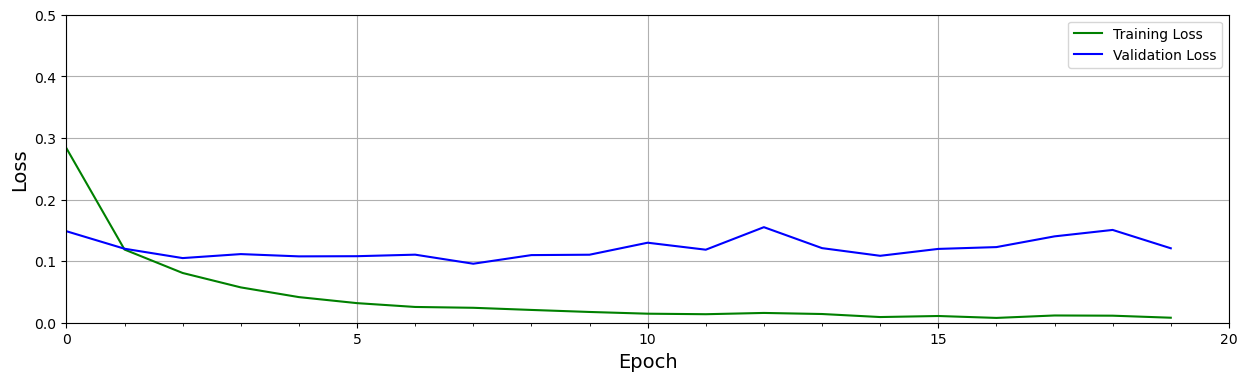

In [72]:
train_loss = training_results.history['loss']
train_acc = training_results.history['accuracy']
val_acc = training_results.history['val_accuracy']
val_loss = training_results.history['val_loss']

plot_training_results(
    [train_loss, val_loss],
    ylabel="Loss",
    ylim=[0.0, 0.5],
    metric_name=["Training Loss", "Validation Loss"],
    color=["g", "b"],
)

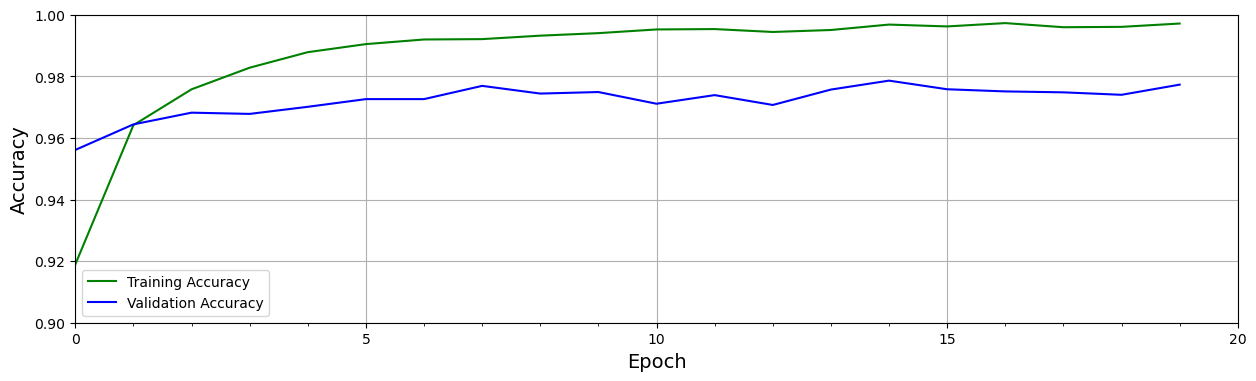

In [75]:
plot_training_results(
    [train_acc, val_acc],
    ylabel="Accuracy",
    ylim=[0.9, 1.0],
    metric_name=["Training Accuracy", "Validation Accuracy"],
    color=["g", "b"],
)

In [81]:
predictions = model.predict(X_test)

index = 0

print("Actual: ", y_test[index])
for i in range(10):
    print("Digit: ",i, "Prob: ", predictions[index][i])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Actual:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Digit:  0 Prob:  4.85546e-17
Digit:  1 Prob:  1.2745296e-10
Digit:  2 Prob:  3.5792573e-09
Digit:  3 Prob:  1.2145219e-09
Digit:  4 Prob:  1.216321e-16
Digit:  5 Prob:  1.5983325e-13
Digit:  6 Prob:  2.8968994e-22
Digit:  7 Prob:  1.0
Digit:  8 Prob:  3.921799e-15
Digit:  9 Prob:  2.415159e-12


In [83]:
predictions = model.predict(X_test)

pred_lables = [np.argmax(i) for i in predictions]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


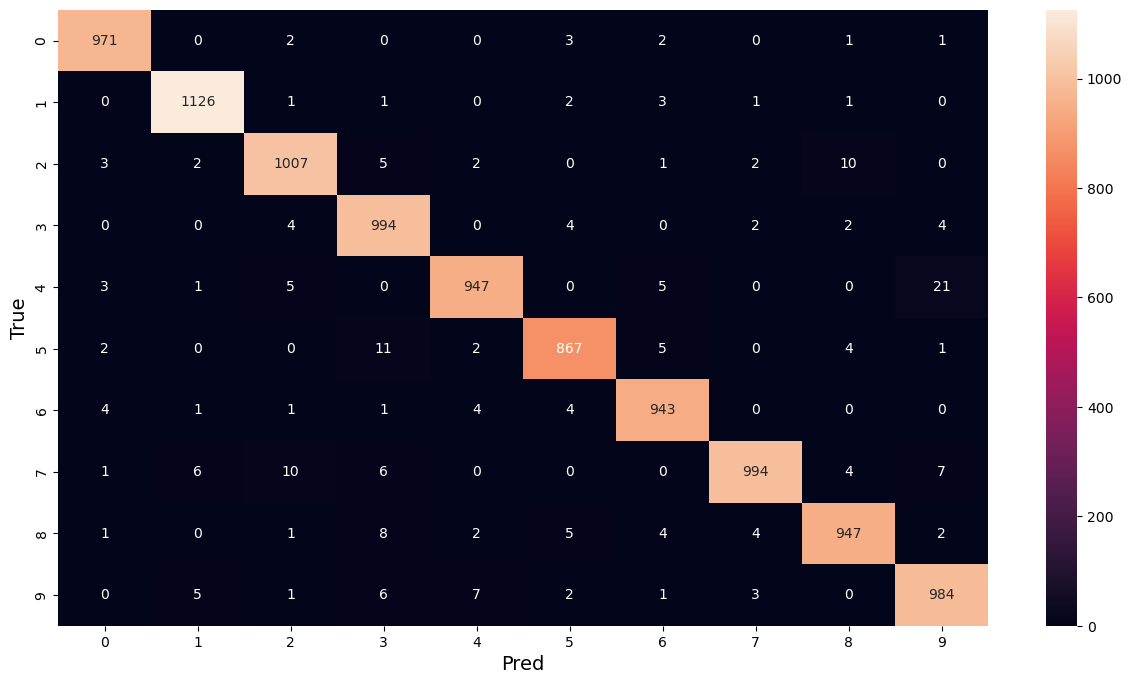

In [88]:
y_test_int_labels = tf.argmax(y_test, axis=1)

cm = tf.math.confusion_matrix(labels=y_test_int_labels, predictions=pred_lables)

plt.figure(figsize=[15,8])
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Pred")
plt.ylabel("True")
plt.show()